In [72]:
import pandas
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
from datetime import datetime

In [2]:
def calculateMargin(df):
    df['Margin'] = df['Close'] - df['Open']

In [3]:
btc_df = pandas.read_csv("/Users/jteruya/crypto/btc_prices.csv")
eth_df = pandas.read_csv("/Users/jteruya/crypto/eth_prices.csv")

In [68]:
print btc_df.iloc[1]

Date          5/30/16
Open           532.26
High           546.92
Low            513.15
Close          528.92
Adj Close      528.92
Volume       60896411
Margin       -3.34003
Name: 1, dtype: object


In [89]:
btc_close_X = btc_df['Date'].values[:, np.newaxis][:,]
btc_close_Y = btc_df['Close'].values[:, np.newaxis][:,]

def split_date(string_date):
    y = string_date.split('/')
    return datetime(int('20' + y[2]), int(y[0]), int(y[1]))

#print map(lambda x: split_date(x), btc_close_X)
btc_close_X_date = [lambda x: split_date(x) for x in btc_close_X]
print btc_close_X[1]
print type(btc_close_X_date)

['5/30/16']
<type 'list'>


ValueError: invalid literal for float(): 5/29/18

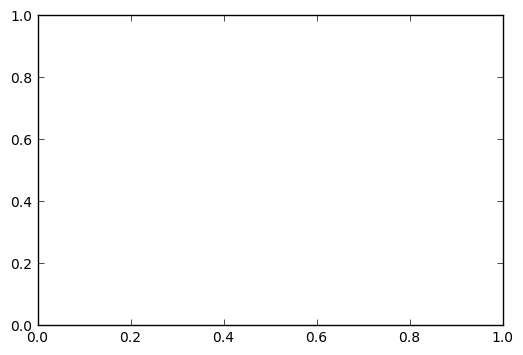

In [71]:
plt.plot(btc_close_X, btc_close_Y, color='blue', linewidth=3)
plt.show()

In [4]:
calculateMargin(btc_df)
calculateMargin(eth_df)

In [5]:
btc_train = btc_df[:-20]
btc_test = btc_df[-20:]
eth_train = eth_df[:-20]
eth_test = eth_df[-20:]

In [6]:
btc_train_X = btc_train['Volume'].values[:, np.newaxis][:,]
btc_train_Y = btc_train['Margin'].values[:, np.newaxis][:,]
btc_test_X = btc_test['Volume'].values[:, np.newaxis][:,]
btc_test_Y = btc_test['Margin'].values[:, np.newaxis][:,]

In [7]:
btc_regr = linear_model.LinearRegression()
btc_regr.fit(btc_train_X, btc_train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
btc_pred_Y = btc_regr.predict(btc_test_X)

In [9]:
print('Coefficients: \n', btc_regr.coef_)

('Coefficients: \n', array([[ -4.25512710e-08]]))


In [10]:
print("Mean squared error: %.2f"
      % mean_squared_error(btc_test_Y, btc_pred_Y))

Mean squared error: 65448.95


In [11]:
print('Variance score: %.2f' % r2_score(btc_test_Y, btc_pred_Y))

Variance score: -0.10


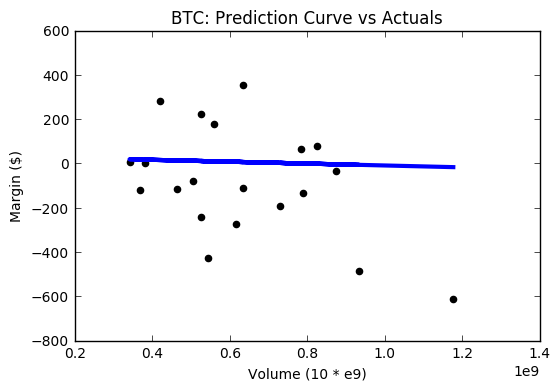

In [62]:
plt.scatter(btc_test_X, btc_test_Y, color='black')
plt.plot(btc_test_X, btc_pred_Y, color='blue', linewidth=3)
plt.xlabel('Volume (10 * e9)')
plt.ylabel('Margin ($)')
plt.title('BTC: Prediction Curve vs Actuals')

plt.show()

In [27]:
eth_train_X = eth_train['Volume'].values[:, np.newaxis][:,]
eth_train_Y = eth_train['Margin'].values[:, np.newaxis][:,]
eth_test_X = eth_test['Volume'].values[:, np.newaxis][:,]
eth_test_Y = eth_test['Margin'].values[:, np.newaxis][:,]
eth_regr = linear_model.LinearRegression()
eth_regr.fit(eth_train_X, eth_train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
eth_pred_Y = eth_regr.predict(eth_test_X)
print('Coefficients: \n', eth_regr.coef_)

('Coefficients: \n', array([[ -9.36694785e-09]]))


In [29]:
print("Mean squared error: %.2f"
      % mean_squared_error(eth_test_Y, eth_pred_Y))

Mean squared error: 1093.77


In [30]:
print('Variance score: %.2f' % r2_score(eth_test_Y, eth_pred_Y))

Variance score: -0.04


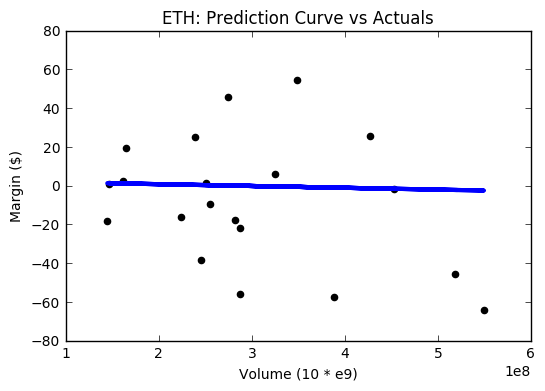

In [61]:
plt.scatter(eth_test_X, eth_test_Y, color='black')
plt.plot(eth_test_X, eth_pred_Y, color='blue', linewidth=3)
plt.xlabel('Volume (10 * e9)')
plt.ylabel('Margin ($)')
plt.title('ETH: Prediction Curve vs Actuals')


plt.show()

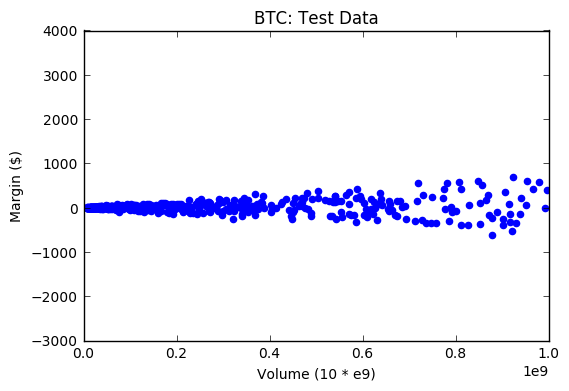

In [64]:
plt.scatter(btc_train_X, btc_train_Y, COLOR = 'blue')
plt.xlabel('Volume (10 * e9)')
plt.ylabel('Margin ($)')
plt.title('BTC: Test Data')
plt.axis([0, 1000000000, -3000, 4000])
plt.show()

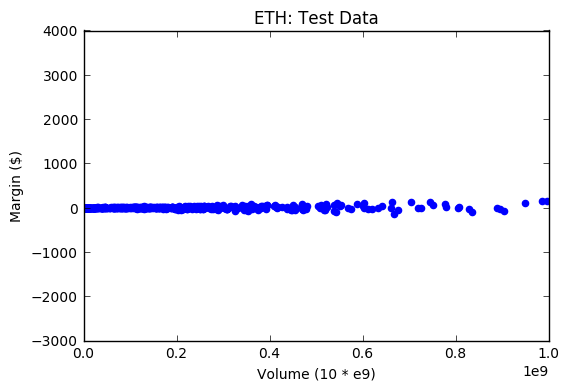

In [66]:
plt.scatter(eth_train_X, eth_train_Y, COLOR = 'blue')
plt.xlabel('Volume (10 * e9)')
plt.ylabel('Margin ($)')
plt.title('ETH: Test Data')
plt.axis([0, 1000000000, -3000, 4000])
plt.show()